<a href="https://colab.research.google.com/github/yadukul/ML-Lab/blob/main/ML_Lab_02_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## BL.EN.U4CSE21222
## Yadukul S
##ML LAB-02

### A1.  Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the following tasks:
### 1) Study each attribute and associated values present. Identify the datatype (nominal etc.) for the attribute.

In [ ]:
import numpy as np
import pandas as py
from scipy import stats
from sklearn.preprocessing import StandardScaler
data = py.read_excel(r"/content/19CSE305_LabData_Set3.1.xlsx",sheet_name="thyroid0387_UCI")
df = py.DataFrame(data)
data_types = {}
for column in df.columns:
  unique_values = df[column].unique()
  if len(unique_values) > 10:
    data_types[column] = "Ordinal"
  else:
    data_types[column] = "Nominal"
for column, data_type in data_types.items():
    print("Attribute:", column)
    print("Datatype:", data_type)


Attribute: Record ID
Datatype: Ordinal
Attribute: age
Datatype: Ordinal
Attribute: sex
Datatype: Nominal
Attribute: on thyroxine
Datatype: Nominal
Attribute: query on thyroxine
Datatype: Nominal
Attribute: on antithyroid medication
Datatype: Nominal
Attribute: sick
Datatype: Nominal
Attribute: pregnant
Datatype: Nominal
Attribute: thyroid surgery
Datatype: Nominal
Attribute: I131 treatment
Datatype: Nominal
Attribute: query hypothyroid
Datatype: Nominal
Attribute: query hyperthyroid
Datatype: Nominal
Attribute: lithium
Datatype: Nominal
Attribute: goitre
Datatype: Nominal
Attribute: tumor
Datatype: Nominal
Attribute: hypopituitary
Datatype: Nominal
Attribute: psych
Datatype: Nominal
Attribute: TSH measured
Datatype: Nominal
Attribute: TSH
Datatype: Ordinal
Attribute: T3 measured
Datatype: Nominal
Attribute: T3
Datatype: Ordinal
Attribute: TT4 measured
Datatype: Nominal
Attribute: TT4
Datatype: Ordinal
Attribute: T4U measured
Datatype: Nominal
Attribute: T4U
Datatype: Ordinal
Attribute:

### 2)For categorical attributes, identify the encoding scheme to be employed.(Guidance:employ label encoding for ordinal variables while One-Hot encoding may be employed for nominal variables).

In [ ]:
data_types = {}
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) > 10:
        data_types[column] = "Employ Label encoding"
    else:
        data_types[column] = "One-hot encoding"
for column, data_type in data_types.items():
    print("Attribute:", column)
    print("Datatype:", data_type)
    print()

Attribute: Record ID
Datatype: Employ Label encoding

Attribute: age
Datatype: Employ Label encoding

Attribute: sex
Datatype: One-hot encoding

Attribute: on thyroxine
Datatype: One-hot encoding

Attribute: query on thyroxine
Datatype: One-hot encoding

Attribute: on antithyroid medication
Datatype: One-hot encoding

Attribute: sick
Datatype: One-hot encoding

Attribute: pregnant
Datatype: One-hot encoding

Attribute: thyroid surgery
Datatype: One-hot encoding

Attribute: I131 treatment
Datatype: One-hot encoding

Attribute: query hypothyroid
Datatype: One-hot encoding

Attribute: query hyperthyroid
Datatype: One-hot encoding

Attribute: lithium
Datatype: One-hot encoding

Attribute: goitre
Datatype: One-hot encoding

Attribute: tumor
Datatype: One-hot encoding

Attribute: hypopituitary
Datatype: One-hot encoding

Attribute: psych
Datatype: One-hot encoding

Attribute: TSH measured
Datatype: One-hot encoding

Attribute: TSH
Datatype: Employ Label encoding

Attribute: T3 measured
Datat

### 3) Study the data range for numeric variables.

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
data_ranges = numeric_columns.apply(lambda x: x.max() - x.min())
print("Data Range for Numeric Variables:")
print(data_ranges)

Data Range for Numeric Variables:
Record ID    230019
age              96
dtype: int64


###4) Study the presence of missing values in each attribute.

In [ ]:
missing_values = {}
for column in df.columns:
    missing_values[column] = df[column].isna().sum()
print(missing_values)

{'Record ID': 0, 'age': 0, 'sex': 0, 'on thyroxine': 0, 'query on thyroxine': 0, 'on antithyroid medication': 0, 'sick': 0, 'pregnant': 0, 'thyroid surgery': 0, 'I131 treatment': 0, 'query hypothyroid': 0, 'query hyperthyroid': 0, 'lithium': 0, 'goitre': 0, 'tumor': 0, 'hypopituitary': 0, 'psych': 0, 'TSH measured': 0, 'TSH': 0, 'T3 measured': 0, 'T3': 0, 'TT4 measured': 0, 'TT4': 0, 'T4U measured': 0, 'T4U': 0, 'FTI measured': 0, 'FTI': 0, 'TBG measured': 0, 'TBG': 0, 'referral source': 0, 'Condition': 0}


### 5) Study the outliers in the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
df = pd.read_excel(r"/content/19CSE305_LabData_Set3.1.xlsx",sheet_name="thyroid0387_UCI")
z_scores = np.abs(stats.zscore(df['age']))
threshold = 100
outliers = np.where(z_scores > threshold)
print(outliers)

(array([], dtype=int64),)


### 6) For numeric variables, calculate the mean and variance (or standard deviation).

In [ ]:
Mean = numeric_columns.mean()
print("Mean of numeric values: ",Mean)

StandardDeviation = numeric_columns.std()
print("Standard Deviation of numeric values: ",StandardDeviation)

Mean of numeric values:  Record ID    8.409340e+08
age          5.150900e+01
dtype: float64
Standard Deviation of numeric values:  Record ID    76287.343316
age             18.776541
dtype: float64


### A2. Data Imputation: employ appropriate central tendencies to fill the missing values in the data variables. Employ following guidance.
### • Mean may be used when the attribute is numeric with no outliers
### • Median may be employed for attributes which are numeric and contain outliers
### • Mode may be employed for categorical attributes

In [ ]:
import pandas as pd
df = pd.read_excel('/content/19CSE305_LabData_Set3.1.xlsx',sheet_name='thyroid0387_UCI')
columns_with_missing_values = ['TSH', 'T3', 'T4U']
for column in columns_with_missing_values:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        df[column].replace({'?':df[column].mean()},inplace=True)
    elif df[column].dtype == 'object':
        df[column].replace({'?':df[column].mode()[0]},inplace=True)
    else:
        df[column].replace({'?':df[column].median()},inplace=True)
print(df['TSH'])

0       0.3
1       1.6
2       0.1
3       0.1
4       0.1
       ... 
995     0.1
996    53.0
997     0.1
998     0.1
999     3.3
Name: TSH, Length: 1000, dtype: float64


### A3. Data Normalization / Scaling: from the data study, identify the attributes which may need normalization. Employ appropriate normalization techniques to create normalized set of data.

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
min_range = 0
max_range = 1
min_values = numeric_columns.min()
max_values = numeric_columns.max()
min_max_scaled = (numeric_columns - min_values) / (max_values - min_values) * (max_range - min_range) + min_range
df[numeric_columns.columns] = min_max_scaled
print(df['age'])

0      0.291667
1      0.291667
2      0.416667
3      0.364583
4      0.322917
         ...   
995    0.416667
996    0.416667
997    0.197917
998    0.197917
999    0.750000
Name: age, Length: 1000, dtype: float64


### A4. Similarity Measure:Take the first 2 observation vectors from the dataset. Consider only the attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate the Jaccard Coefficient(JC) and Simple Matching Coefficient (SMC)between the document vectors. Use first vector for each document for this.Compare the values for JC and SMC and judge the appropriateness of each of them.

In [ ]:
import pandas as pd
def jaccard_coefficient(vector1, vector2):
    intersection = len(set(vector1).intersection(set(vector2)))
    union = len(set(vector1)) + len(set(vector2)) - intersection
    return intersection / union
def simple_matching_coefficient(vector1, vector2):
    intersection = len(set(vector1).intersection(set(vector2)))
    union = len(set(vector1).union(set(vector2)))
    return intersection / union


excel_file_path = '/content/19CSE305_LabData_Set3.1.xlsx'
df = pd.read_excel(r'/content/19CSE305_LabData_Set3.1.xlsx',sheet_name='thyroid0387_UCI')
vector1 = df.iloc[0]
vector2 = df.iloc[1]
jc = jaccard_coefficient(vector1, vector2)
smc = simple_matching_coefficient(vector1, vector2)
print("Jaccard coefficient:", jc)
print("Simple Matching coefficient:", smc)


Jaccard coefficient: 0.5384615384615384
Simple Matching coefficient: 0.5384615384615384


### A5. Cosine Similarity Measure:Now take the complete vectors for these two observations (including all the attributes). Calculate the Cosine similarity between the documents by using the second feature vector for each document.

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
df = pd.read_excel('/content/19CSE305_LabData_Set3.1.xlsx', sheet_name="thyroid0387_UCI")
vector1 = df.iloc[1:2]
vector2 = df.iloc[1:2]
cosine_sim = cosine_similarity(vector1, vector2)
print("Cosine Similarity between Vector 1 and Vector 2:", cosine_sim[0][0])

ValueError: ignored

A6. Heatmap Plot:Consider the first 20 observation vectors. Calculate the JC, SMC and COS between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient calculation as in A4& A5. Employ a heatmap plot to visualize the similarities.

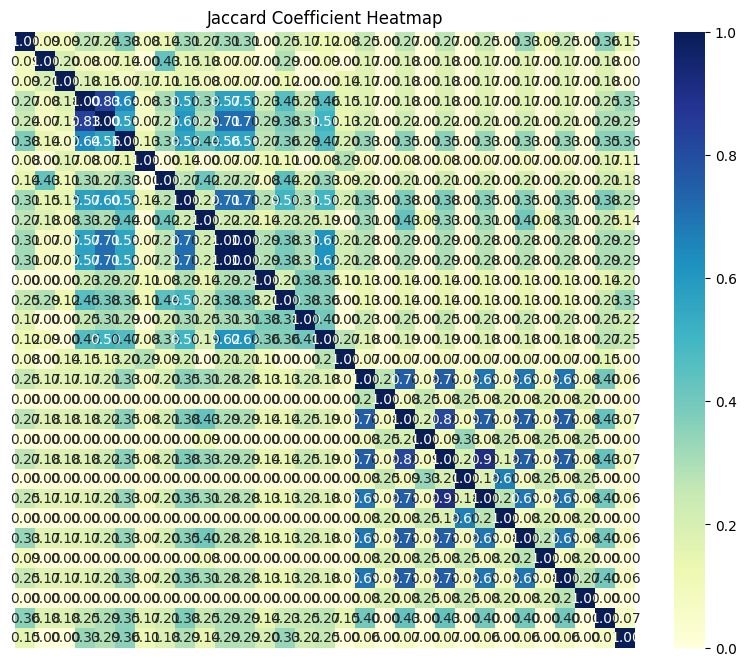

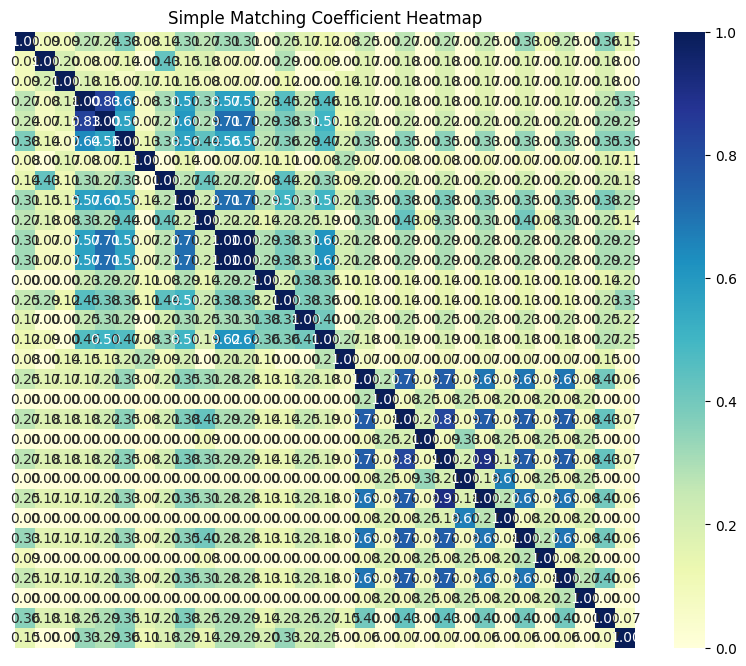

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('/content/19CSE305_LabData_Set3.1.xlsx', sheet_name='thyroid0387_UCI')
vectors = df.iloc[:20]
def jaccard_coefficient(vector1, vector2):
    intersection = len(set(vector1) & set(vector2))
    union = len(set(vector1) | set(vector2))
    return intersection / union
def simple_matching_coefficient(vector1, vector2):
    intersection = len(set(vector1) & set(vector2))
    union = len(set(vector1) | set(vector2))
    return intersection / union
jc_matrix = [[jaccard_coefficient(vector1, vector2) for vector2 in vectors] for vector1 in vectors]
smc_matrix = [[simple_matching_coefficient(vector1, vector2) for vector2 in vectors] for vector1 in vectors]
plt.figure(figsize=(10, 8))
sns.heatmap(jc_matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Jaccard Coefficient Heatmap")
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(smc_matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Simple Matching Coefficient Heatmap")
plt.show()
